<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_2_Assignments_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
# Set the random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
# Generate the dataset with 5 features
# X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=seed)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Rekha215/Machine-Learning-Laboratory/main/regression_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [ ]:
# Split the DataFrame into features (X) and target (y)
X = df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']]
y = df['target']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Convert DataFrame to numpy arrays for KNN operations
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()

In [ ]:
# Define KNN average function
def knn_average(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        k_indices = np.argsort(distances)[:k]
        y_pred.append(np.mean(y_train[k_indices]))
    return np.array(y_pred)

In [ ]:
# Define KNN weighted average function
def knn_weighted_average(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        k_indices = np.argsort(distances)[:k]
        weights = 1 / distances[k_indices]
        # Handle division by zero in case of zero distance (if any)
        weights[np.isnan(weights)] = 0
        y_pred.append(np.sum(weights * y_train[k_indices]) / np.sum(weights))
    return np.array(y_pred)

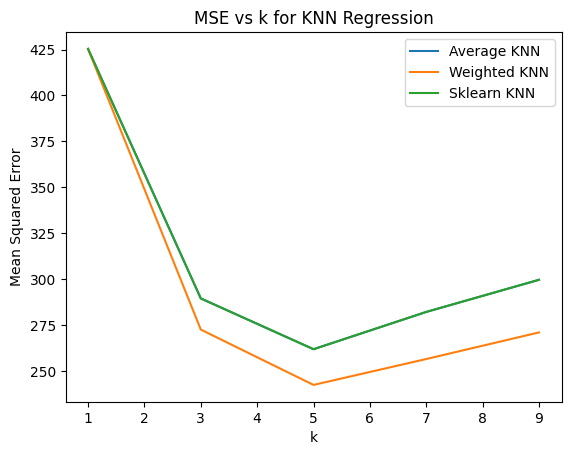

Average KNN MSE values: [425.3221985089597, 289.58353697078354, 261.96001504034894, 282.24394586236957, 299.7183038710065]
Weighted KNN MSE values: [425.3221985089597, 272.63613723900374, 242.5351463539428, 256.6256972461653, 271.0873213072807]
Sklearn KNN MSE values: [425.3221985089597, 289.58353697078354, 261.96001504034894, 282.24394586236957, 299.7183038710065]


In [ ]:
# Evaluate and plot results
k_values = [1, 3, 5, 7, 9]
mse_values_avg = []
mse_values_weighted = []
mse_values_sklearn = []

for k in k_values:
    y_pred_avg = knn_average(X_train_np, y_train_np, X_test_np, k)
    mse_avg = mean_squared_error(y_test, y_pred_avg)
    mse_values_avg.append(mse_avg)

    y_pred_weighted = knn_weighted_average(X_train_np, y_train_np, X_test_np, k)
    mse_weighted = mean_squared_error(y_test, y_pred_weighted)
    mse_values_weighted.append(mse_weighted)

    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred_sklearn = knn.predict(X_test)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
    mse_values_sklearn.append(mse_sklearn)

plt.plot(k_values, mse_values_avg, label='Average KNN')
plt.plot(k_values, mse_values_weighted, label='Weighted KNN')
plt.plot(k_values, mse_values_sklearn, label='Sklearn KNN')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('MSE vs k for KNN Regression')
plt.show()

# Display results
print("Average KNN MSE values:", mse_values_avg)
print("Weighted KNN MSE values:", mse_values_weighted)
print("Sklearn KNN MSE values:", mse_values_sklearn)